In [3]:
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [2]:
def load_and_combine(mat_files):
    X_combined, Y_combined = [], []
    for file in mat_files:
        data = loadmat(file)
        X = data['X_4d']  # 确保变量名与.mat文件中的一致
        Y = data['Y_2d']  # 如果维度是(4, n_samples)，需转置为X.T
        X_combined.append(X)
        Y_combined.append(Y)
    return np.vstack(X_combined), np.vstack(Y_combined)

folder = "data"
with os.scandir(folder) as entries:
    mat_files = [entry.path for entry in entries if entry.name.endswith('.mat') and entry.is_file()]
X, Y = load_and_combine(mat_files)

可视化

In [4]:
import pandas as pd
data = pd.DataFrame(np.hstack([X, Y]), columns=['x1', 'x2','x3','x4', 't', 'omg'])
sns.pairplot(data,diag_kind="kde",kind="scatter",x_vars=['x1', 'x2','x3','x4'],y_vars=['t', 'omg'],plot_kws=dict(s=50,edgecolor="w",color="g",alpha=.5))
plt.show()

NameError: name 'X' is not defined

模型训练

In [1]:
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from model.vae import CVAE
from src.utils import loss_fn

In [6]:
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

NameError: name 'X' is not defined

In [13]:
device = "cuda"

model = CVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [10]:
torch.cuda.is_available()

True

train

In [ ]:
n_epochs = 100
for epoch in range(n_epochs):
    total_loss = 0
    for x_batch, y_batch in dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        x_recon, mu, logvar = model(x_batch, y_batch)
        loss = loss_fn(x_recon, x_batch, mu, logvar)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}: Loss = {total_loss / len(dataloader):.4f}")


torch.save(model.state_dict(), "results/vae_model.pth")

Epoch 1: Loss = 0.0457
Epoch 2: Loss = 0.0286
Epoch 3: Loss = 0.0230
Epoch 4: Loss = 0.0191
Epoch 5: Loss = 0.0170
Epoch 6: Loss = 0.0155
Epoch 7: Loss = 0.0147
Epoch 8: Loss = 0.0144
Epoch 9: Loss = 0.0140
Epoch 10: Loss = 0.0135
Epoch 11: Loss = 0.0130
Epoch 12: Loss = 0.0125
Epoch 13: Loss = 0.0118
Epoch 14: Loss = 0.0111
Epoch 15: Loss = 0.0105
Epoch 16: Loss = 0.0101
Epoch 17: Loss = 0.0096
Epoch 18: Loss = 0.0093
Epoch 19: Loss = 0.0090
Epoch 20: Loss = 0.0087
Epoch 21: Loss = 0.0085
Epoch 22: Loss = 0.0083
Epoch 23: Loss = 0.0080
Epoch 24: Loss = 0.0078
Epoch 25: Loss = 0.0078
Epoch 26: Loss = 0.0076
Epoch 27: Loss = 0.0075
Epoch 28: Loss = 0.0075
Epoch 29: Loss = 0.0074
Epoch 30: Loss = 0.0073
Epoch 31: Loss = 0.0074
Epoch 32: Loss = 0.0073
Epoch 33: Loss = 0.0073
Epoch 34: Loss = 0.0072
Epoch 35: Loss = 0.0073
Epoch 36: Loss = 0.0072
Epoch 37: Loss = 0.0072
Epoch 38: Loss = 0.0071
Epoch 39: Loss = 0.0071
Epoch 40: Loss = 0.0071
Epoch 41: Loss = 0.0071
Epoch 42: Loss = 0.0071
E

sample

In [7]:
model_path = "results/vae_model.pth"
model = CVAE()
model.load_state_dict(torch.load(model_path))

from src.utils import gengrate_sample
samples = gengrate_sample(model, cond=[57.67,-0.39],num_samples=10)

In [12]:
samples

array([[1.9039488e-03, 4.8126930e-01, 2.0018013e+00, 5.5649504e-03],
       [1.9165422e-03, 4.7280401e-01, 2.0007980e+00, 5.4605044e-03],
       [1.9325553e-03, 4.7953743e-01, 2.0005460e+00, 5.4948255e-03],
       [1.8730240e-03, 4.8521799e-01, 1.9987676e+00, 5.5047832e-03],
       [1.9365312e-03, 4.7138542e-01, 2.0007100e+00, 5.4596197e-03],
       [1.9236491e-03, 4.9312443e-01, 1.9991947e+00, 5.5168774e-03],
       [1.9233082e-03, 4.9245018e-01, 1.9996445e+00, 5.6155808e-03],
       [1.9019095e-03, 4.8488325e-01, 1.9992239e+00, 5.4932497e-03],
       [1.9311991e-03, 4.7616094e-01, 2.0023615e+00, 5.5383351e-03],
       [1.9136686e-03, 4.7216696e-01, 2.0019143e+00, 5.5265930e-03]],
      dtype=float32)

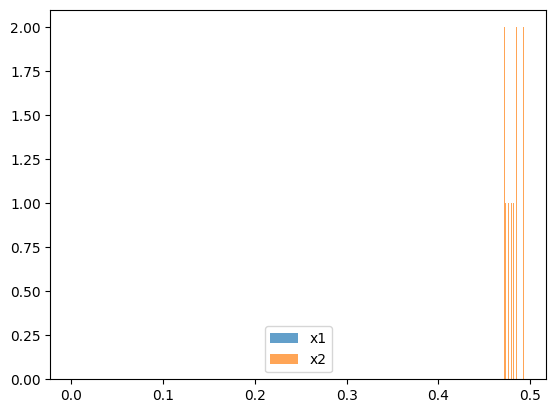

In [10]:
plt.figure()
plt.hist(samples[:, 0], bins=20, alpha=0.7, label='x1')
plt.hist(samples[:, 1], bins=20, alpha=0.7, label='x2')
plt.legend()